In [12]:
# 📦 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os


In [13]:
# 📥 2. Load Dataset
df = pd.read_csv("../data/creditcard.csv")
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# 🧪 3. Basic Info
print(df.info())
print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

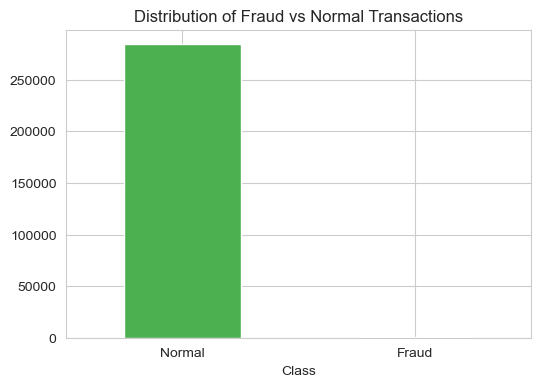

In [15]:
# 📊 4. EDA - Distribution of Fraud vs Normal
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['#4CAF50','#F44336'])
plt.title("Distribution of Fraud vs Normal Transactions")
plt.xticks([0,1], ['Normal', 'Fraud'], rotation=0)
plt.show()


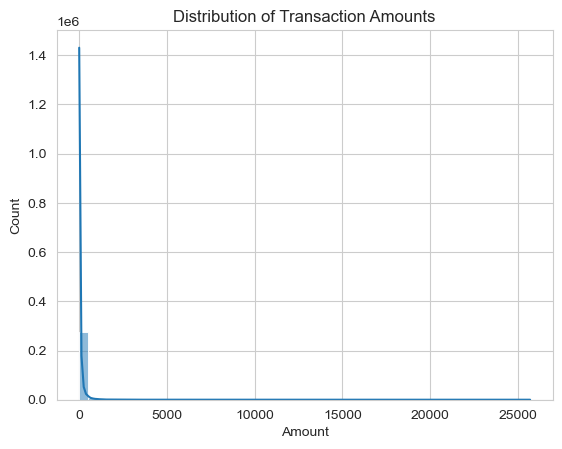

In [16]:
# 📊 5. EDA - Histogram of Amounts
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()


In [17]:
# 📈 6. EDA - Time vs Amount Scatter Plot using Plotly
sample_df = df.sample(10000)
fig = px.scatter(sample_df, x="Time", y="Amount", color=sample_df["Class"].astype(str), title="Time vs Amount")
fig.show()


In [18]:
# 🧮 7. Feature Engineering using Lambda
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])
df['Hour'] = df['Time'].apply(lambda x: int(x * 3600) % 24)


In [19]:
# 🧠 8. Modeling - Encapsulated in Class
class FraudDetector:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

    def train(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title("Confusion Matrix")
        plt.show()

    def save_model(self, path):
        os.makedirs(os.path.dirname(path), exist_ok=True)
        joblib.dump(self.model, path)


In [20]:
# 🧪 9. Train-Test Split
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



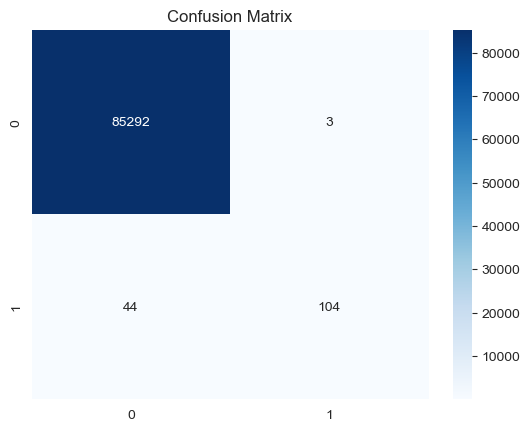

In [21]:
# 🚀 10. Train and Evaluate Model
detector = FraudDetector()
detector.train(X_train, y_train)
detector.evaluate(X_test, y_test)


In [22]:
# 💾 11. Save Model
detector.save_model("../models/fraud_model.pkl")


In [23]:
# 🔍 12. Predict Sample Preview
sample = df.head(10).copy()
sample['predicted'] = detector.predict(sample.drop(columns=['Class']))
sample['risk'] = sample['predicted'].apply(lambda x: 'High' if x==1 else 'Low')
sample[['Time', 'Amount', 'risk']]

,Time,Amount,risk
0,-1.996583,0.244964,Low
1,-1.996583,-0.342475,Low
2,-1.996562,1.160686,Low
3,-1.996562,0.140534,Low
4,-1.996541,-0.073403,Low
5,-1.996541,-0.338556,Low
6,-1.996499,-0.333279,Low
7,-1.996436,-0.190107,Low
8,-1.996436,0.019392,Low
9,-1.996394,-0.338516,Low
